# Resumen Estadísticos
## Distribución Normal $N(\mu,\sigma^2)$
### $\mu$ ($\sigma$ conocido y desconocido):

In [25]:
test_norm_mu = function(alpha, tipo, datos, mu0, sigma2){
    if(missing(sigma2)){
        T = normalizar(mean(datos), mu0, var(datos), length(datos))
        
        switch(tipo,
           { # TIPO 1= H1: mu > mu0
               q = -qt(alpha, df=length(datos)-1)
               resultado = (T >= q)
           }, 
           { # TIPO 2= H1: mu < mu0
               q = qt(alpha, df=length(datos)-1)
               resultado = (T <= q)
           }, 
           { # TIPO 3= H1: mu != mu0
               q = -qt(alpha/2, df=length(datos)-1)
               resultado = (abs(T) >= q)
           } 
        )
        
    }else{
        T = normalizar(mean(datos), mu0, sigma2, length(datos))
        
        switch(tipo,
           { # TIPO 1= H1: mu > mu0
               q = -qnorm(alpha)
               resultado = (T >= q)
           }, 
           { # TIPO 2= H1: mu < mu0
               q = qnorm(alpha)
               resultado = (T <= q)
           }, 
           { # TIPO 3= H1: mu != mu0
               q = -qnorm(alpha/2)
               resultado = (abs(T) >= q)
           } 
        )
    }
    resultadoToText(resultado)
}

### $\sigma^2$ ($\mu$ desconocido):

In [26]:
test_norm_sigma = function(alpha, tipo, datos, sigma2_0){
    T = (length(datos)-1) * var(datos) / sigma2_0

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = qchisq(alpha, df=length(datos)-1, lower.tail = FALSE)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qchisq(1-alpha, df=length(datos)-1, lower.tail = FALSE)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           lower = qchisq(alpha/2, df=length(datos)-1, lower.tail = FALSE)
           upper = qchisq(1-alpha/2, df=length(datos)-1, lower.tail = FALSE)
           
           resultado = (T >= lower || T<= upper)
       } 
    )
    resultadoToText(resultado)
}        

## Distribución Exponencial $\mathcal{E}(\lambda)$

In [27]:
test_exp = function(alpha, tipo, datos, lambda_0){
    T = 2*lamda_0*sum(datos)

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = qchisq(1-alpha, df=2*length(datos), lower.tail = FALSE)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qchisq(alpha, df=2*length(datos), lower.tail = FALSE)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           lower = qchisq(alpha/2, df=2*length(datos), lower.tail = FALSE)
           upper = qchisq(1-alpha/2, df=2*length(datos), lower.tail = FALSE)
           
           resultado = (T >= lower || T<= upper)
       } 
    )
    resultadoToText(resultado)
}   

## Tests asintóticos
### Media $\mu$ (varianza desconocida):

In [30]:
test_asint_media = function(alpha, tipo, datos, mu0){
    T = normalizar(mean(datos), mu0, var(datos), length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

### Distribución Binomial $Bi(1,p)$:

In [36]:
test_binomial = function(alpha, tipo, datos, p0){
    T = normalizar(mean(datos), p0, p0*(1-p0), length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

### Distribución Poisson $\mathcal{P}(\lambda)$:

In [29]:
test_asint_media = function(alpha, tipo, datos, lambda_0){
    T = normalizar(mean(datos), lambda_0, lambda_0, length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

# Funciones auxiliares:

In [1]:
resultadoToText = function(res){
    if(res) 'Si, rechazo H0\n' else 'No, no rechazo H0\n'
}

normalizar = function(media, mu, sigma2, n){
    (media-mu) / (sqrt(sigma2 / n))
}

# Ejercicio 1
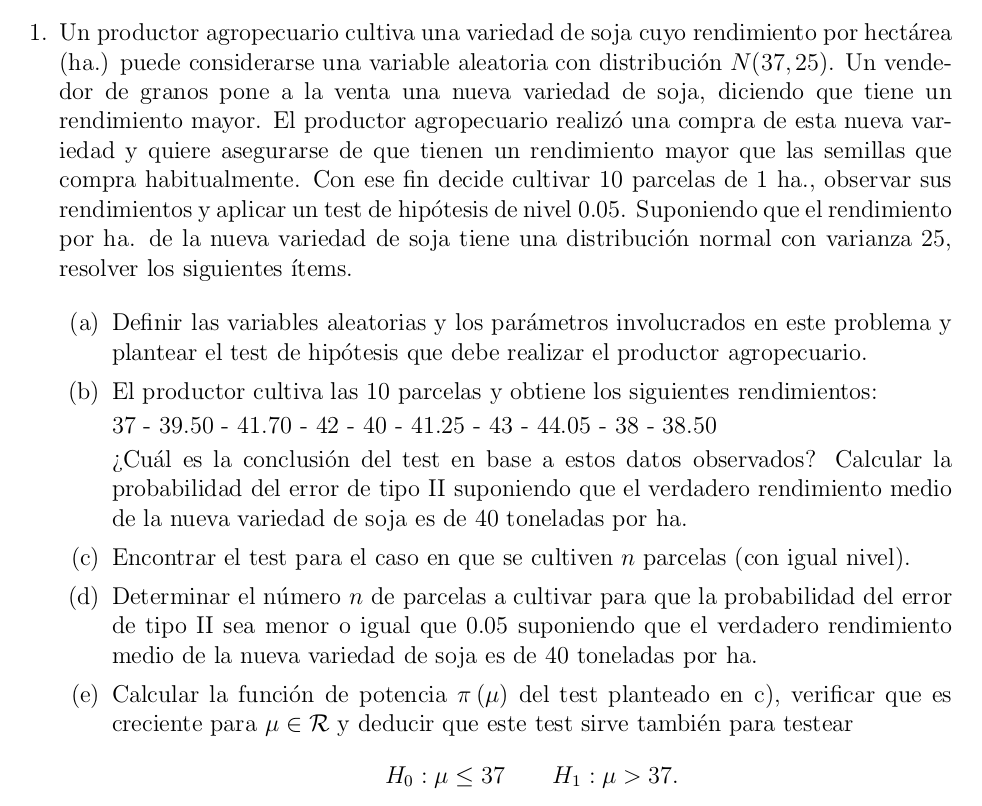

a) 

$X$= rendimiento por ha actual $X$~N(37, 25)

$Y$= rendimiento por ha nueva soja $Y_i$~N($\mu$, 25)

n = 10, nivel = 0.05

$$H_0: \mu=37$$
$$H_1: \mu>37$$

Función de potencia
[video de la clase](https://www.youtube.com/watch?v=nWs6xU7ZP9c&feature=emb_logo)
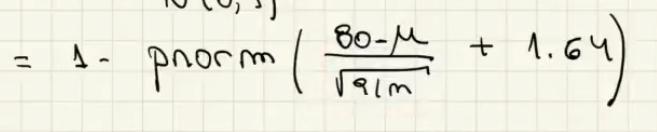

In [2]:
#b)
rendimientos = scan(text='37 39.50 41.70 42 40 41.25 43 44.05 38 38.50')
mu0 = 37
alpha = 0.05
sigma2 = 25
T = normalizar(mean(rendimientos), mu0, sigma2, length(rendimientos))
q = -qnorm(alpha)

cat('b)\nT:', T, '>= Z_alpha:', q, '?\t', resultadoToText(T >= q))

#funcion de potencia
potencia1 = function(mu){
    1-pnorm(q + normalizar(mu0, mu, sigma2, length(rendimientos))) 
}
cat('Prob tipo I (nivel del test):', potencia1(mu0), '\n')

#asumo mu=40 => Y~N(40,25)
mu = 40
cat('Prob tipo II si mu=40:', potencia1(mu))

b)
T: 2.213594 >= Z_alpha: 1.644854 ?	 Si, rechazo H0
Prob tipo I (nivel del test): 0.05 
Prob tipo II si mu=40: 0.5996777

c) ídem a pero n genérico?

d) $$\Phi(1.645 + \frac{37-40}{\sqrt{\frac{25}{n}}}) \leq 0.05$$

$$\Phi(-(1.645 + \frac{37-40}{\sqrt{\frac{25}{n}}})) \geq 0.95$$

$$-1.645 - \frac{37-40}{\sqrt{\frac{25}{n}}} \geq \Phi^{-1}(0.95)$$

$$\frac{3}{5}\sqrt{n} \geq 3.29$$

$$n \geq 30.06$$


In [3]:
#d)
cat('n>=',((-qnorm(0.05) + q) * sqrt(sigma2) / -(mu0-mu))^2)

n>= 30.06159

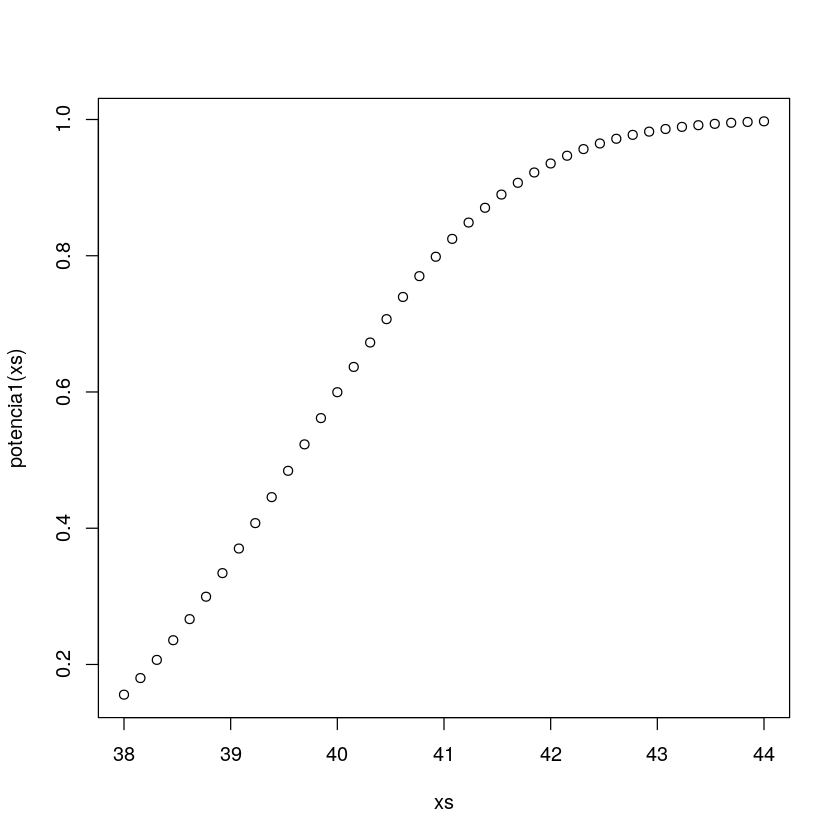

In [4]:
#e)
xs = seq(38, 44, length=40)
plot(xs, potencia1(xs))

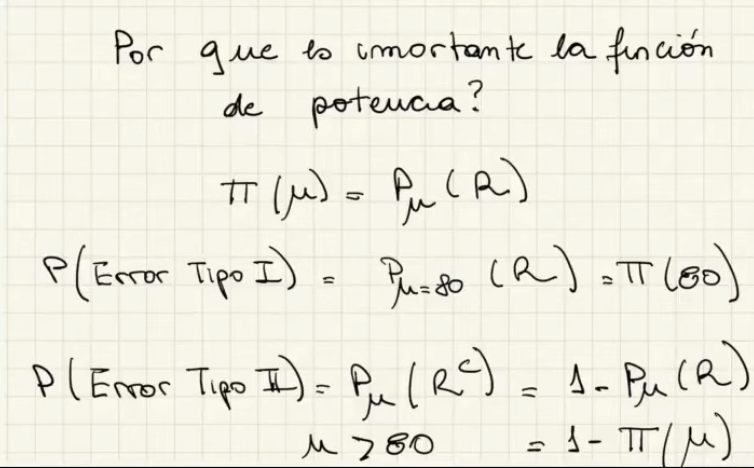

# Ejercicio 2
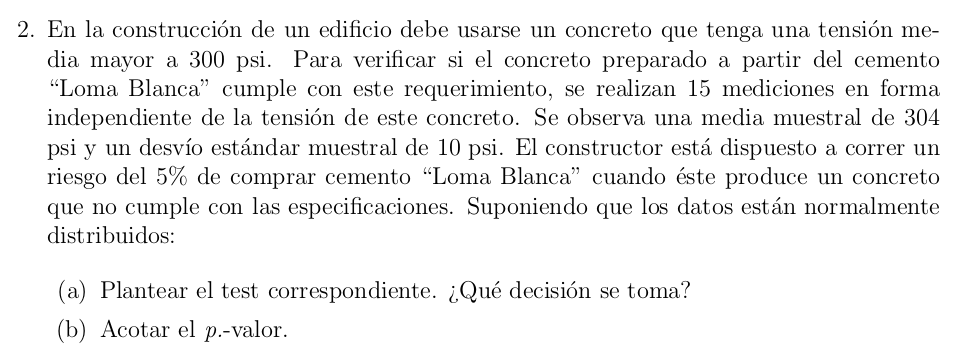

a) 
$$H_0: \mu\leq300 =>\ no\ se\ compra\ el\ cemento$$

$$H_1: \mu>300 =>\ se\ compra\ el\ cemento$$

In [5]:
#a)
alpha = 0.05
mu0 = 300
n=15
media_obs = 304
sigma_obs = 10
T = normalizar(media_obs, mu0, sigma_obs^2, n)
q = -qt(alpha, df=n-1)

cat('a)\nT:', T, '>= Z_alpha:', q, '?\t', resultadoToText(T >= q))

pInf = pnorm(-normalizar(media_obs,mu0,sigma_obs^2,n))
pSup = pnorm(normalizar(media_obs,mu0+sigma_obs,sigma_obs^2,n))
cat('b)', pInf, '< p-valor <', pSup,'????!!!')

a)
T: 1.549193 >= Z_alpha: 1.76131 ?	 No, no rechazo H0
b) 0.06066763 < p-valor < 0.01006838 ????!!!

# Ejercicio 3
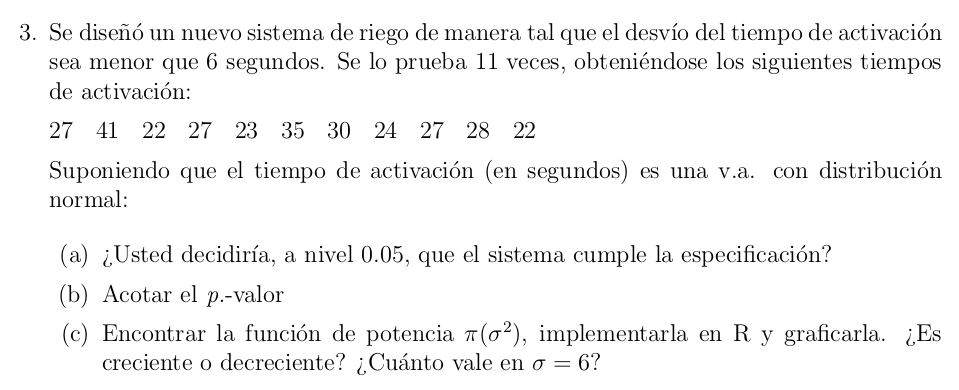

a) el test H0: sigma2=6  H1: sigma2>sigma2_0 da: Si, rechazo H0
 i.e. no se cumple la especificacion

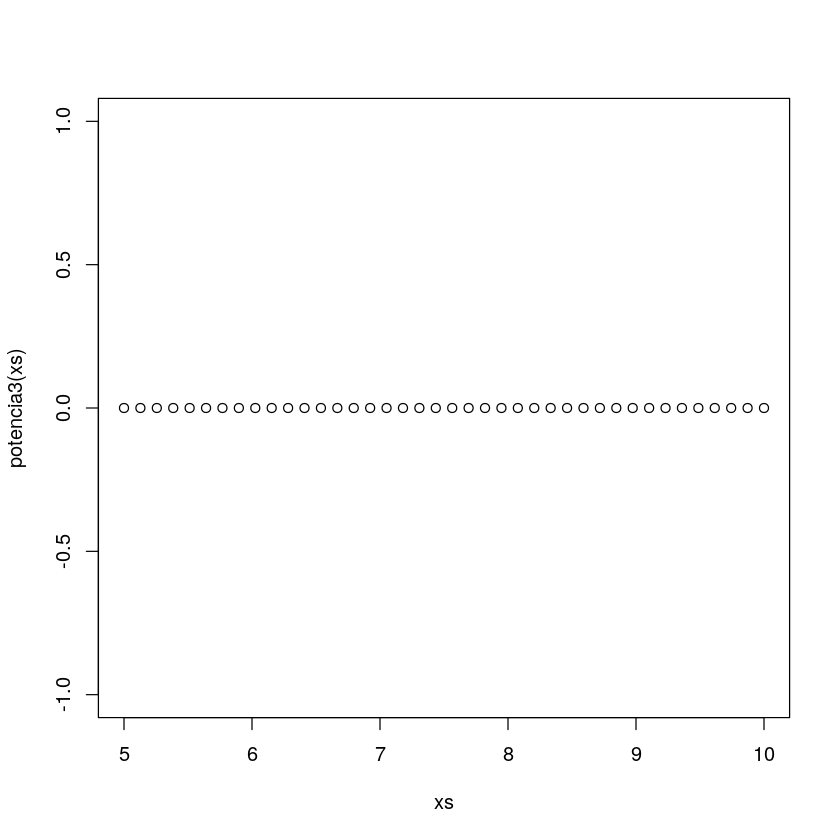

In [35]:
datos3 = scan(text="27 41 22 27 23 35 30 24 27 28 22")
#a
cat('a) el test H0: sigma2=6  H1: sigma2>sigma2_0 da:', test_norm_sigma(0.05, 1, datos3, 6), 'i.e. no se cumple la especificacion')

#b

#c
potencia3 = function(sigma2){
    1-pnorm(q + normalizar(mean(datos3), 0, abs(6-sigma2), length(datos3))) ## como es esta func de potencia?
}

xs = seq(5, 10, length=40)
plot(xs, potencia3(xs))

# Ejercicio 4